<a href="https://colab.research.google.com/github/jazminmontenegro/Visualizaci-n-de-datos-/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATOS PEROSNALES

NOMBRE: Angie Jazmin Montenegro Hurtado


#Descripción del conjunto de datos

**Objetivo:** En esta competencia, su tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado de la nave. .

**PassengerId - A:**identificación única para cada pasajero. Cada identificación toma la forma gggg_pp, donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas en un grupo suelen ser miembros de la familia, pero no siempre.

**HomePlanet:**  El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

**CryoSleep:** Indica si el pasajero eligió estar en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus camarotes.

**Cabin:** El número de camarote donde se hospeda el pasajero Toma la forma cubierta/num/lado, donde lado puede ser P para babor o S para estribor.

**Destination:** El planeta al que desembarcará el pasajero.

**Age:** La edad del pasajero.

**VIP:** Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.

**Name:** El nombre y apellido del pasajero.

**Transported:** Si el pasajero fue transportado a otra dimensión Este es el objetivo, la columna que está tratando de predecir.

**test.csv:** Registros personales del tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Su tarea es predecir el valor de Transportado para los pasajeros de este conjunto.

**sample_submission.csv:** Un archivo de envío en el formato correcto.


#Montar datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importen las bibliotecas

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier



#Carguen el conjunto de datos

In [71]:
train0 = '/content/drive/MyDrive/Colab/spaceship-titanic/train.csv'
train0 = pd.read_csv(train0)
test0 = '/content/drive/MyDrive/Colab/spaceship-titanic/test.csv'
test0 = pd.read_csv(test0)
result0= '/content/drive/MyDrive/Colab/spaceship-titanic/sample_submission.csv'
result0 = pd.read_csv(result0)

In [72]:
print(len(test0))
print(len(result0))
print(len(train0))

4277
4277
8693


In [73]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [74]:
train0.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train0= train0.drop(columns=['Cabin','Name'])# Eliminamos columnas que no son necesarias.
train0

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [8]:
test0.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
test0= test0.drop(columns=['Cabin','Name'])#Eliminamos columnas que no son necesarias.
test0

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [10]:
result0

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


#LIMPIEZA DE DATOS

* Lo primero es hacer un df.info para ver que cumpla el dtpye con el diccionario de datos.

* Relizamos duplicated para ver que no hayan duplicados

In [11]:
train0.duplicated().sum()

0

In [12]:
test0.duplicated().sum()

0

In [13]:
result0.duplicated().sum()

0

#Manejar los datos faltantes en el train

* se realiza isna para ver datos vacios pero como muestra, tenemos datos nulos.

In [14]:
train0.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Para los datos numericos vamos a utilizar el valor más común en esa columna.

In [15]:
CryoSleep= train0['CryoSleep'].median()
train0['CryoSleep'].fillna(CryoSleep, inplace=True)


In [16]:
Age = train0['Age'].median()
train0['Age'].fillna(Age , inplace=True)


In [17]:
RoomService = train0['RoomService'].median()
train0['RoomService'].fillna(RoomService , inplace=True)


In [18]:
FoodCourt = train0['FoodCourt'].median()
train0['FoodCourt'].fillna(FoodCourt , inplace=True)


In [19]:
ShoppingMall = train0['ShoppingMall'].median()
train0['ShoppingMall'].fillna(ShoppingMall , inplace=True)


In [20]:
Spa = train0['Spa'].median()
train0['Spa'].fillna(ShoppingMall , inplace=True)


In [21]:
VRDeck = train0['VRDeck'].median()
train0['VRDeck'].fillna(VRDeck, inplace=True)


In [22]:
VIP = train0['VIP'].median()
train0['VIP'].fillna(VIP, inplace=True)


In [23]:
train0['Destination'].fillna('Missing', inplace=True)

In [24]:
train0['HomePlanet'].fillna('Missing', inplace=True)

#procedemos a limpiar nuestro test

In [25]:
test0.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [26]:
CryoSleep= test0['CryoSleep'].median()
test0['CryoSleep'].fillna(CryoSleep, inplace=True)

In [27]:
Age = test0['Age'].median()
test0['Age'].fillna(Age , inplace=True)

In [28]:
RoomService = test0['RoomService'].median()
test0['RoomService'].fillna(RoomService , inplace=True)

In [29]:
FoodCourt = test0['FoodCourt'].median()
test0['FoodCourt'].fillna(FoodCourt , inplace=True)

In [30]:
ShoppingMall = test0['ShoppingMall'].median()
test0['ShoppingMall'].fillna(ShoppingMall , inplace=True)

In [31]:
Spa = test0['Spa'].median()
test0['Spa'].fillna(ShoppingMall , inplace=True)


In [32]:
VRDeck = test0['VRDeck'].median()
test0['VRDeck'].fillna(VRDeck, inplace=True)

In [33]:
VIP = test0['VIP'].median()
test0['VIP'].fillna(VIP, inplace=True)


In [34]:
test0['HomePlanet'].fillna('Missing', inplace=True)

In [35]:
test0['Destination'].fillna('Missing', inplace=True)

#VISUALIZACIONES 

Mapa de calor 

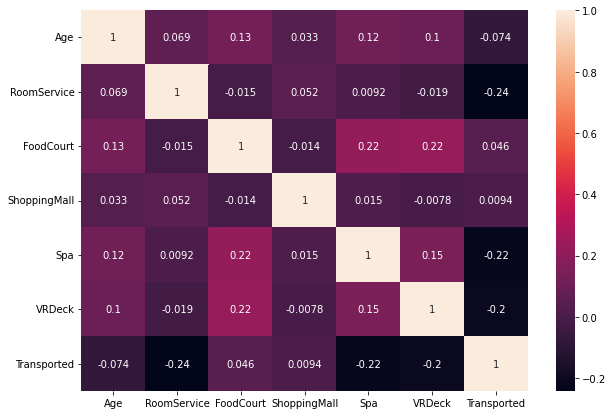

In [36]:
# Calculate correlations
corr = train0.corr()
 
# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot = True)
plt.show()

<Figure size 288x432 with 0 Axes>

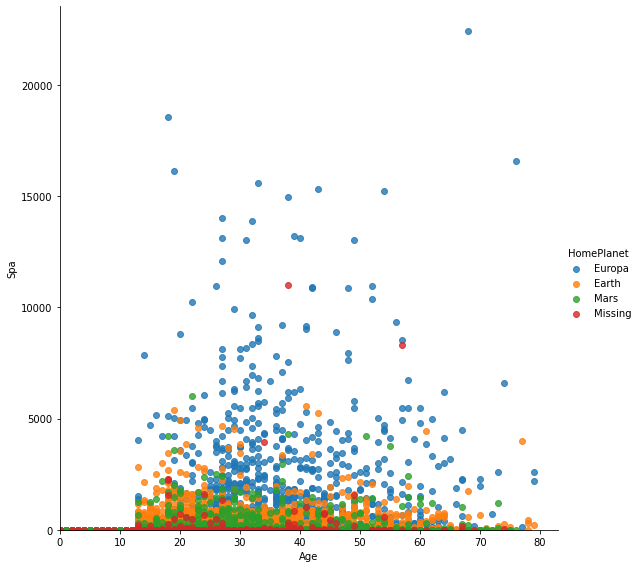

In [37]:
# plot seaborn
plt.figure(figsize=(4, 6))
sns.lmplot(x='Age',
           y='Spa', 
           data=train0,
           fit_reg=False, 
           height=8,
           hue= 'HomePlanet')
 
# usar Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

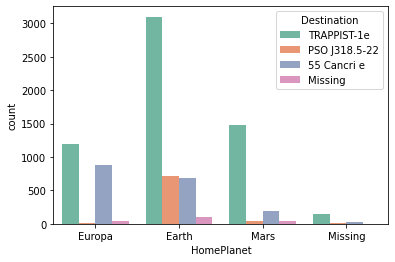

In [38]:
sns.countplot(x= 'HomePlanet', hue='Destination', data=train0, palette='Set2')
plt.show()

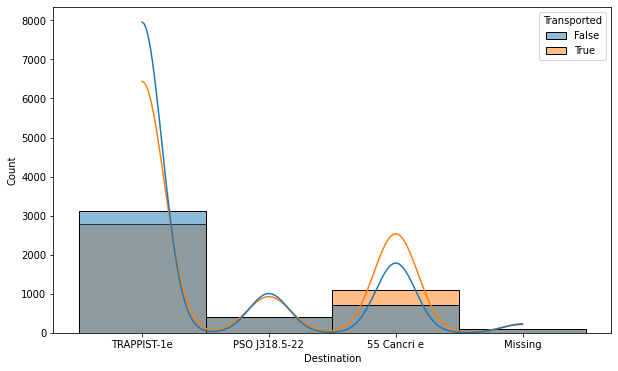

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.histplot(data=train0, x="Destination", hue="Transported", bins=8, kde=True, ax=ax)
plt.show()

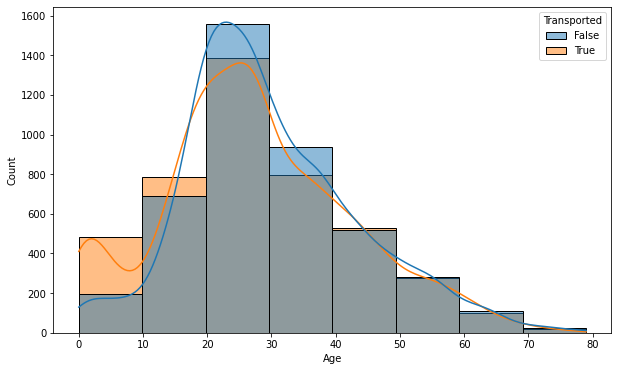

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.histplot(data=train0, x="Age", hue="Transported", bins=8, kde=True, ax=ax)
plt.show()

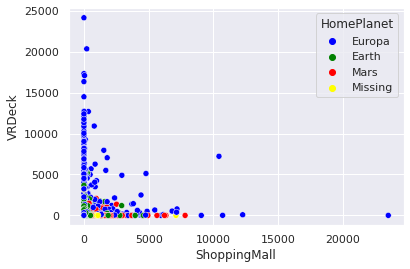

In [41]:
sns.set(rc={'figure.figsize':(6,4)})

sns.scatterplot(
        x='ShoppingMall',
        y='VRDeck',
        data=train0,
        hue='HomePlanet',
        palette = ['blue', 'green', 'red','yellow']
    
)
plt.show()

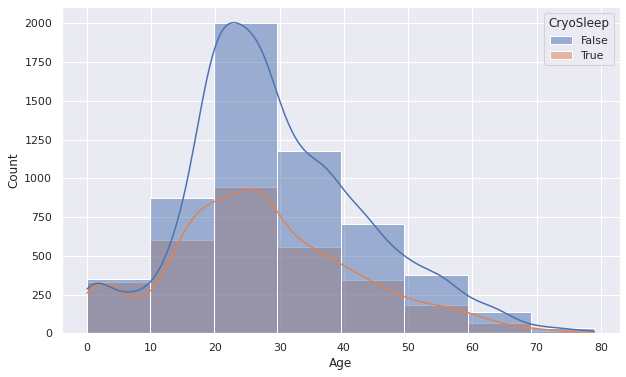

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.histplot(data=train0, x="Age", hue="CryoSleep", bins=8, kde=True, ax=ax)
plt.show()

In [43]:
train0.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


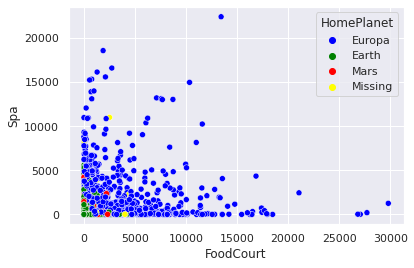

In [44]:
sns.set(rc={'figure.figsize':(6,4)})

sns.scatterplot(
        x='FoodCourt',
        y='Spa',
        data=train0,
        hue='HomePlanet',
        palette = ['blue', 'green', 'red','yellow']
    
)
plt.show()

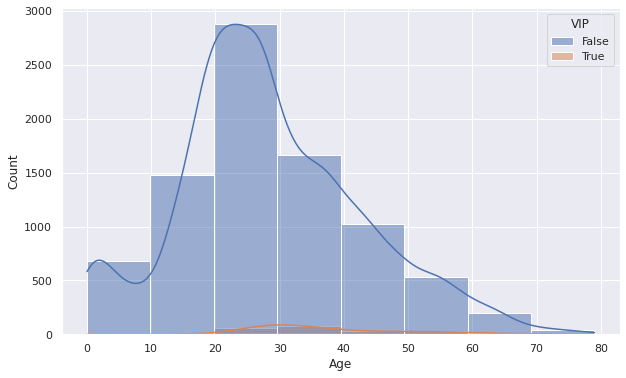

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.histplot(data=train0, x="Age", hue="VIP", bins=8, kde=True, ax=ax)
plt.show()

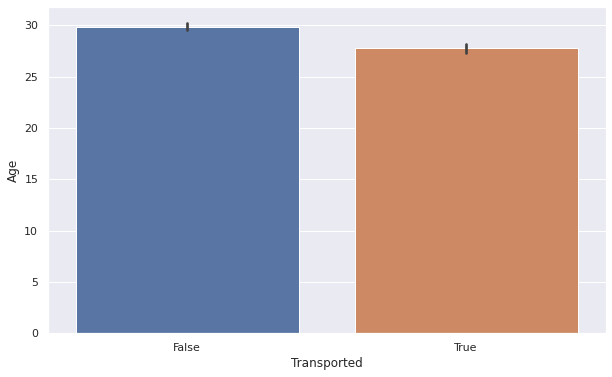

In [46]:
# plot seaborn: barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Transported',
    y='Age',
    data=train0
)
plt.show()

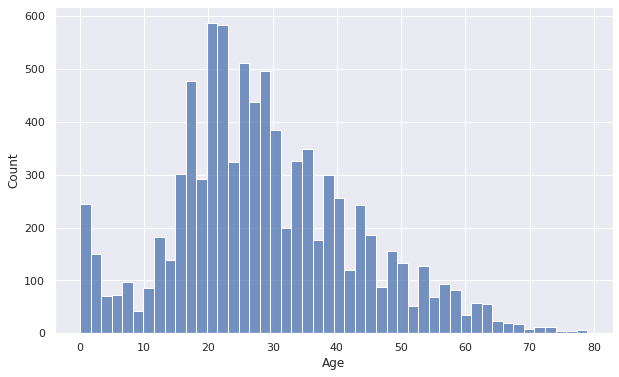

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(train0.Age)
plt.show()

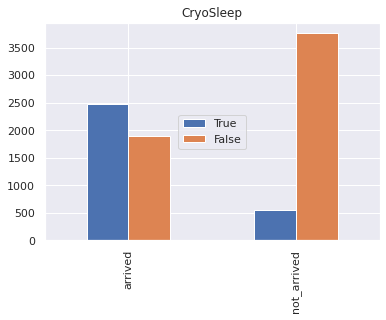

In [48]:
arrived = train0[train0['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = train0[train0['Transported'] == 0]['CryoSleep']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',figsize= (6,4)).legend(loc='center')
plt.title('CryoSleep')
plt. show()

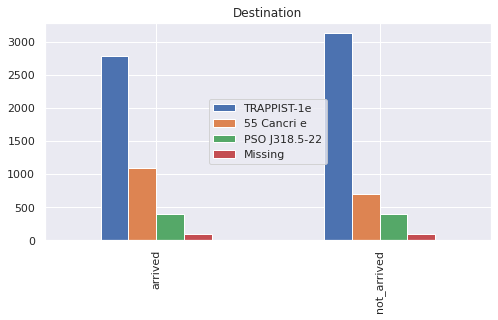

In [49]:
arrived = train0[train0['Transported'] == 1]['Destination']. value_counts()
not_arrived = train0[train0['Transported'] == 0]['Destination']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4)).legend(loc='center')
plt.title('Destination')
plt. show()

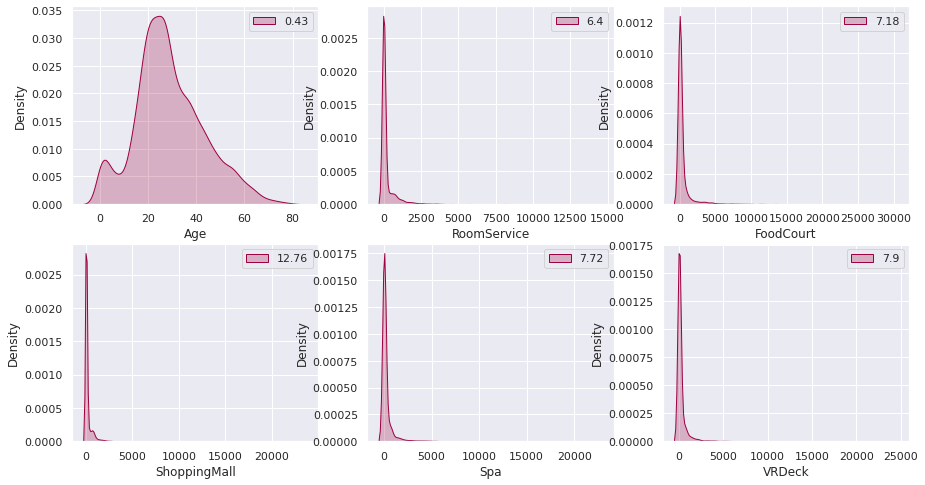

In [50]:
fig,ax = plt.subplots(2,3,figsize=(15,8))

sns.kdeplot(ax=ax[0,0],x='Age',data=train0, fill=True,hue=round(train0['Age'].skew(),2),palette="Spectral")
sns.kdeplot(ax=ax[0,1],x='RoomService',data=train0, fill=True, hue=round(train0['RoomService'].skew(),2),palette='Spectral')
sns.kdeplot(ax=ax[0,2],x='FoodCourt',data=train0, fill=True, hue=round(train0['FoodCourt'].skew(),2),palette="Spectral")
sns.kdeplot(ax=ax[1,0],x='ShoppingMall',data=train0, fill=True, hue=round(train0['ShoppingMall'].skew(),2),palette="Spectral")
sns.kdeplot(ax=ax[1,1],x='Spa',data=train0, fill=True, hue=round(train0['Spa'].skew(),2),palette="Spectral")
sns.kdeplot(ax=ax[1,2],x='VRDeck',data=train0, fill=True, hue=round(train0['VRDeck'].skew(),2),palette="Spectral")

#Escalamiento de datos

In [51]:
train0= train0.drop(columns=['PassengerId'])

In [52]:
test0=test0.drop(columns=['PassengerId'])

In [53]:
result0=result0.drop(columns=['PassengerId'])

In [54]:
print(len(test0))
print(len(result0))
print(len(train0))

4277
4277
8693


#Formato para ML y train test split

In [55]:
X_train= train0.drop(columns = 'Transported')
y_train= train0['Transported']

In [56]:
X_test= test0.copy()

In [57]:
y_test=result0['Transported']


#Realizar selectores de columnas

In [58]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#Instanciar los transformadores

In [59]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [60]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [61]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [62]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a60921f10>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a60921550>)])

In [63]:
col_transformer.fit(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a60921f10>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a60921550>)])

In [64]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [65]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.741103,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.327959,-0.176229,-0.277879,-0.267122,0.229107,-0.211109,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.095249,-0.285892,2.084404,-0.312173,5.810496,-0.207063,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.313478,-0.357339,0.565841,0.356384,2.745529,-0.090544,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.898126,0.146114,-0.237482,-0.040065,0.243590,-0.245094,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [66]:
X_test_df = pd.DataFrame(X_test_processed)
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.114147,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.684313,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.170937,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.669832,-0.357339,4.121518,-0.312173,-0.104002,0.226648,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.613042,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#Árboles de decisión para la clasificación 

instancia del modelo

En esta competencia, vamos a utilizar dos modelos para las predicciones el uno sera Árboles de decisión para la clasificación y el segundo K vecinos más cercanos. 



In [67]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train_df,y_train)
print('Training accuracy:', dec_tree.score(X_train_df, y_train))
print('Testing accuracy:', dec_tree.score(X_test_df, y_test))


Training accuracy: 0.718279075117911
Testing accuracy: 0.6389992985737667


In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_df,y_train)
print('Training accuracy:', logreg.score(X_train_df, y_train))
print('Testing accuracy:', logreg.score(X_test_df, y_test))

Training accuracy: 0.7863798458529851
Testing accuracy: 0.4823474397942483
